# Forecasting

## Config environemnt

In [1]:
# Import library to use operating system functions
import os

In [2]:
# Set workspace
for dirname, _, filenames in os.walk('/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/.DS_Store
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Solicitud de Inicio de Práctica - Erick Dávila.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Informe de Avance 150 horas.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/ALCANCE ESCANEADO PRACTICANTE ERICK DAVILA 2024.pdf
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Solicitud de Inicio de Práctica - Erick Dávila Test.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/

## Load data

In [3]:
# Import library to manage files
import pandas as pd

In [78]:
# Cargar el dataset
data = pd.read_csv('UCI_Credit_Card.csv')

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [79]:
# Select variables for forecasting
forecast_columns = ['LIMIT_BAL', 
                    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_forecast = data[forecast_columns]

data_forecast.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## EDA

In [23]:
# Resumen estadístico
print(data_forecast.describe())

            LIMIT_BAL         PAY_1         PAY_2         PAY_3         PAY_4  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     -0.016700     -0.133767     -0.166200     -0.220667   
std     129747.661567      1.123802      1.197186      1.196868      1.169139   
min      10000.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000      0.000000      0.000000      0.000000      0.000000   
75%     240000.000000      0.000000      0.000000      0.000000      0.000000   
max    1000000.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.

In [22]:
# Verify null data
data_forecast.isnull().sum()

LIMIT_BAL    0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [ ]:
# Replace null data with mean values
data_forecast.fillna(data_forecast.mean(), inplace=True)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

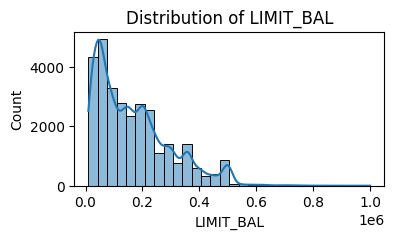

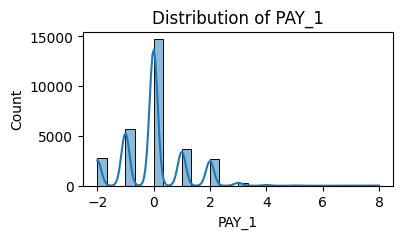

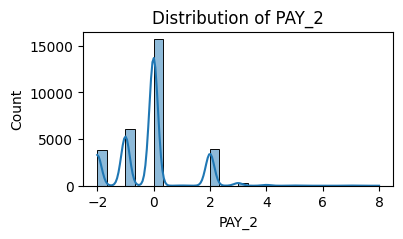

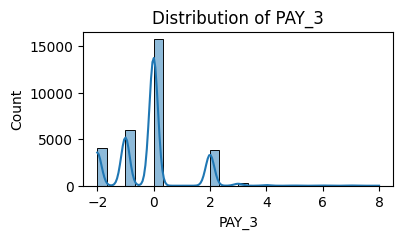

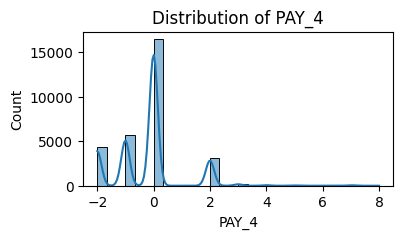

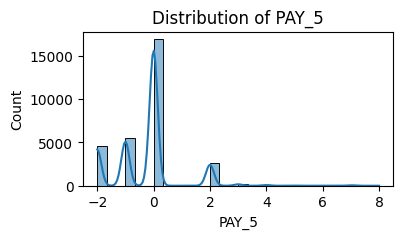

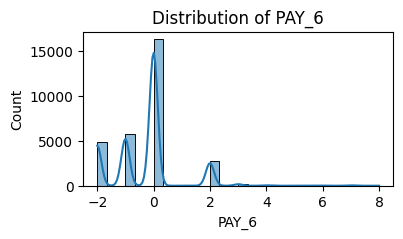

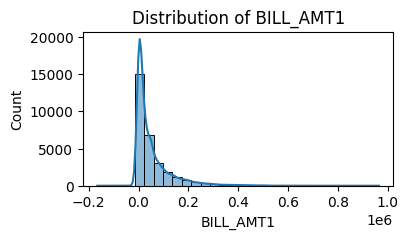

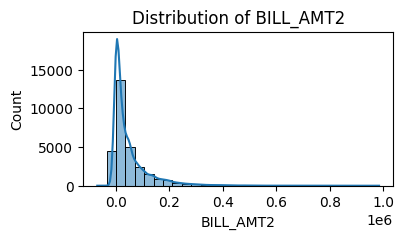

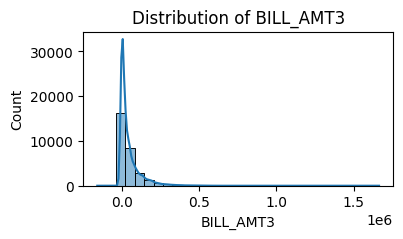

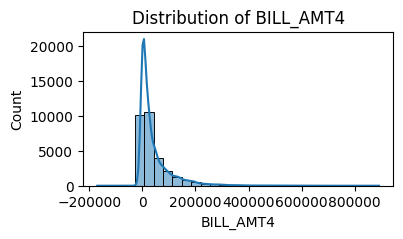

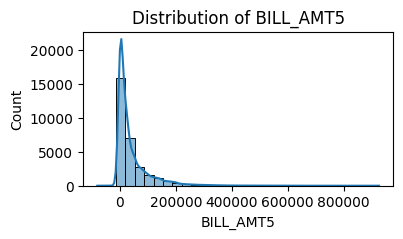

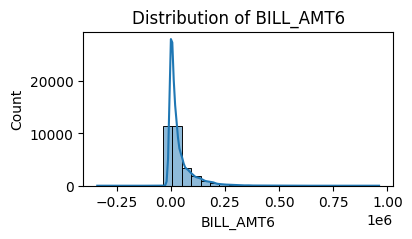

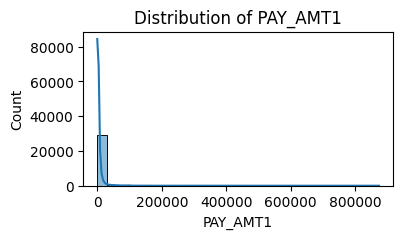

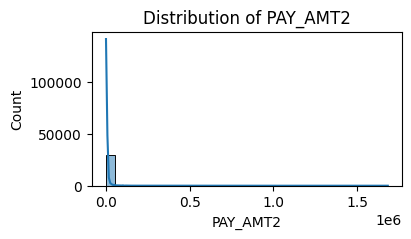

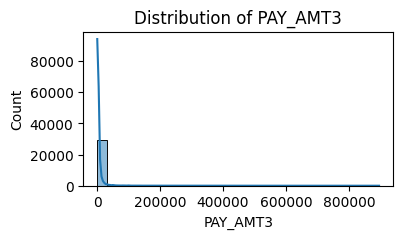

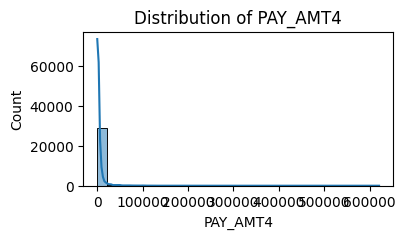

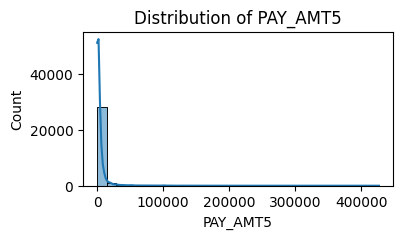

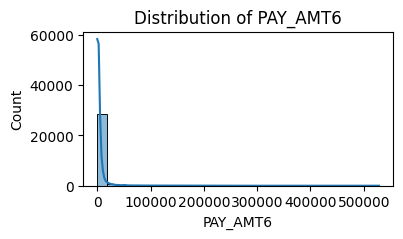

In [80]:
# Histograms for numeric variables
numeric_columns = data_forecast.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data_forecast[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


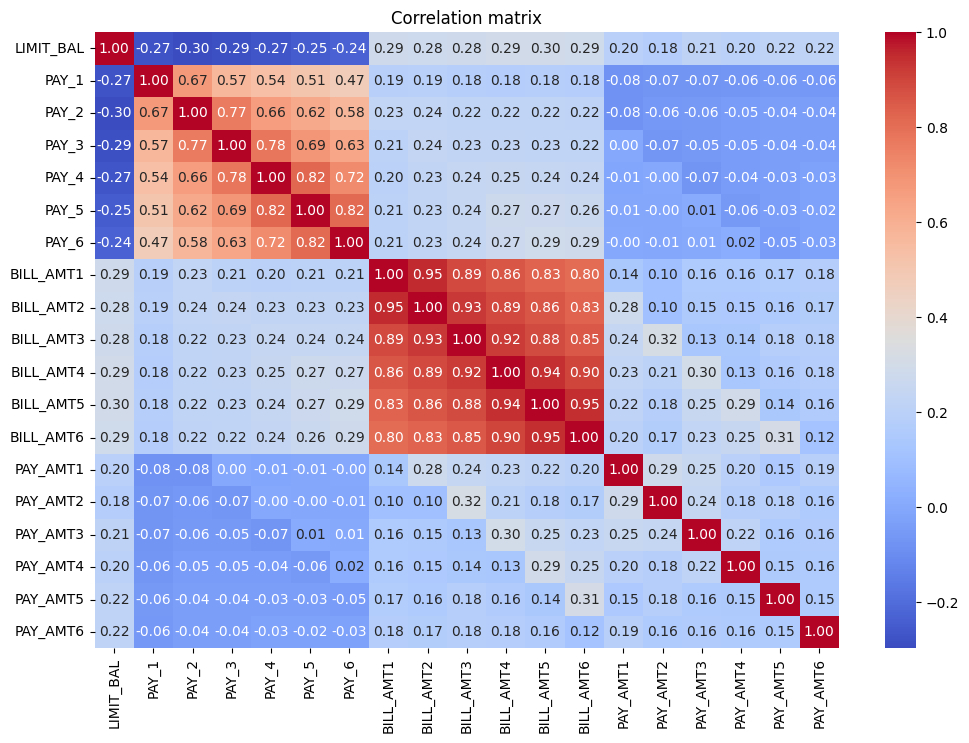

In [81]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_forecast.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

## Handling outliers

In [82]:
# Calculate limits to identify outliers
Q1 = data_forecast.quantile(0.25)
Q3 = data_forecast.quantile(0.75)
IQR = Q3 - Q1

# Lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify columns with outliers
outliers = ((data_forecast < lower_limit) | (data_forecast > upper_limit)).sum()
print("Número de outliers por columna:")
print(outliers[outliers > 0])


Número de outliers por columna:
LIMIT_BAL     167
PAY_1        3130
PAY_2        4410
PAY_3        4209
PAY_4        3508
PAY_5        2968
PAY_6        3079
BILL_AMT1    2400
BILL_AMT2    2395
BILL_AMT3    2469
BILL_AMT4    2622
BILL_AMT5    2725
BILL_AMT6    2693
PAY_AMT1     2745
PAY_AMT2     2714
PAY_AMT3     2598
PAY_AMT4     2994
PAY_AMT5     2945
PAY_AMT6     2958
dtype: int64


In [83]:
# Remove outliers
data_forecast = data_forecast[~((data_forecast < lower_limit) | (data_forecast > upper_limit)).any(axis=1)]

In [84]:
# Replaces outliers with lower and upper bounds
data_forecast = data_forecast.clip(lower=lower_limit, upper=upper_limit, axis=1)

In [85]:
# Check if there are still null values
print("Valores nulos después del tratamiento:")
print(data_forecast.isnull().sum())

# Updated statistical summary
print(data_forecast.describe())

Valores nulos después del tratamiento:
LIMIT_BAL    0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64
           LIMIT_BAL         PAY_1         PAY_2         PAY_3         PAY_4  \
count   13264.000000  13264.000000  13264.000000  13264.000000  13264.000000   
mean   150703.407720     -0.347633     -0.603664     -0.644074     -0.668577   
std    113424.994492      0.819817      0.793049      0.814401      0.830916   
min     10000.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%     50000.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%    120000.000000      0.000000      0.000000      0.000000      0.000000   
75%    210000.000000      0.000000      0.000000      0.000000      0.000000   
max    520000.000000   

In [86]:
# Create lag variables for billing
for i in range(1, 7):
    data_forecast[f'BILL_AMT_lag_{i}'] = data_forecast['BILL_AMT1'].shift(i)
    data_forecast[f'PAY_AMT_lag_{i}'] = data_forecast['PAY_AMT1'].shift(i)

# Delete rows with null values (cause of lags)
data_forecast.dropna(inplace=True)

data_forecast.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,BILL_AMT_lag_2,PAY_AMT_lag_2,BILL_AMT_lag_3,PAY_AMT_lag_3,BILL_AMT_lag_4,PAY_AMT_lag_4,BILL_AMT_lag_5,PAY_AMT_lag_5,BILL_AMT_lag_6,PAY_AMT_lag_6
19,180000.0,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,...,70887.0,3000.0,11876.0,380.0,64400.0,2500.0,46990.0,2000.0,29239.0,1518.0
21,120000.0,-1,-1,-1,-1,-1,-1,316.0,316.0,316.0,...,0.0,0.0,70887.0,3000.0,11876.0,380.0,64400.0,2500.0,46990.0,2000.0
24,90000.0,0,0,0,-1,0,0,4744.0,7070.0,0.0,...,0.0,0.0,0.0,0.0,70887.0,3000.0,11876.0,380.0,64400.0,2500.0
25,50000.0,0,0,0,0,0,0,47620.0,41810.0,36023.0,...,316.0,316.0,0.0,0.0,0.0,0.0,70887.0,3000.0,11876.0,380.0
26,60000.0,1,-2,-1,-1,-1,-1,-109.0,-425.0,259.0,...,4744.0,5757.0,316.0,316.0,0.0,0.0,0.0,0.0,70887.0,3000.0


In [37]:
# Import library to split dataset
from sklearn.model_selection import train_test_split

In [87]:
# Split dataset
X = data_forecast.drop(columns=['BILL_AMT1'])  # Usamos todo excepto la factura actual como predictores
y = data_forecast['BILL_AMT1']  # Variable objetivo

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
# Import library to use lineal regression model
import xgboost as xgb

In [88]:
# Start and train XGBoost model
model_forecast = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_forecast.fit(X_train, y_train)

# Prediction and testing
y_pred_forecast = model_forecast.predict(X_val)

In [41]:
# Import libraries to get metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
mae = mean_absolute_error(y_val, y_pred_forecast)
mse = mean_squared_error(y_val, y_pred_forecast)
r2 = r2_score(y_val, y_pred_forecast)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 4981.405643137092
MSE: 91081981.08535154
R²: 0.9286657743645353


In [98]:
# Prediction with test data
y_pred_test = model_forecast.predict(X_test)

In [91]:
y_pred_test

array([5778.167   ,  -84.027145, 7788.867   , ..., 1237.644   ,
       2855.3232  , 2472.2637  ], dtype=float32)

In [ ]:
# Import library to use ARIMA model 
from statsmodels.tsa.arima.model import ARIMA

In [52]:
# Crear una serie temporal con los datos de facturación
train_series = y_train.sort_index()  # Ordenar por índice temporal
val_series = y_val.sort_index()

# Ajustar el modelo ARIMA
arima_model = ARIMA(train_series, order=(5, 1, 0))  # Parámetros (p, d, q)
arima_model_fit = arima_model.fit()

# Predicciones en el conjunto de validación
arima_preds = arima_model_fit.forecast(steps=len(val_series))
arima_mae = mean_absolute_error(val_series, arima_preds)
arima_mse = mean_squared_error(val_series, arima_preds)
arima_r2 = r2_score(val_series, arima_preds)

print(f"ARIMA - MAE: {arima_mae}, MSE: {arima_mse}, R²: {arima_r2}")

/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA - MAE: 27464.955702588966, MSE: 1743765372.824362, R²: -0.3656944115411702


/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
# Import library to use random forest and gradient boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [94]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

rf_mae = mean_absolute_error(y_val, rf_preds)
rf_mse = mean_squared_error(y_val, rf_preds)
rf_r2 = r2_score(y_val, rf_preds)

print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, R²: {rf_r2}")

Random Forest - MAE: 4446.33045751634, MSE: 85776172.47940563, R²: 0.9328212148124156


In [97]:
rf_preds_test = rf_model.predict(X_test)

In [104]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_val)

gb_mae = mean_absolute_error(y_val, gb_preds)
gb_mse = mean_squared_error(y_val, gb_preds)
gb_r2 = r2_score(y_val, gb_preds)

print(f"Gradient Boosting - MAE: {gb_mae}, MSE: {gb_mse}, R²: {gb_r2}")

Gradient Boosting - MAE: 4486.7740965522, MSE: 83427386.14004171, R²: 0.9346607537937283


In [105]:
gb_preds_test = gb_model.predict(X_test)

In [61]:
# Import library to use neural network
from sklearn.neural_network import MLPRegressor

In [106]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_preds = mlp_model.predict(X_val)

mlp_mae = mean_absolute_error(y_val, mlp_preds)
mlp_mse = mean_squared_error(y_val, mlp_preds)
mlp_r2 = r2_score(y_val, mlp_preds)

print(f"MLP - MAE: {mlp_mae}, MSE: {mlp_mse}, R²: {mlp_r2}")

MLP - MAE: 6298.614307428295, MSE: 112654239.17473681, R²: 0.9117706617673175


In [108]:
mlp_preds_test = mlp_model.predict(X_test)

In [46]:
# Import library to manage vectors and matrixes
import numpy as np

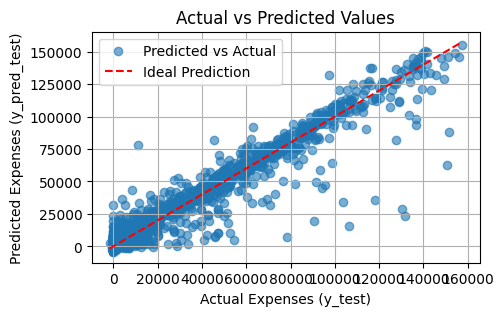

In [99]:
# Scatter plot comparing actual vs predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Expenses (y_test)")
plt.ylabel("Predicted Expenses (y_pred_test)")
plt.legend()
plt.grid()
plt.show()

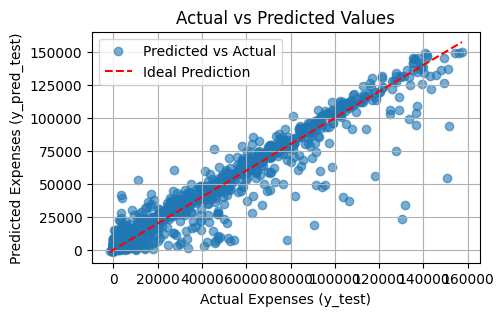

In [100]:
# Scatter plot comparing actual vs predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, rf_preds_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Expenses (y_test)")
plt.ylabel("Predicted Expenses (y_pred_test)")
plt.legend()
plt.grid()
plt.show()

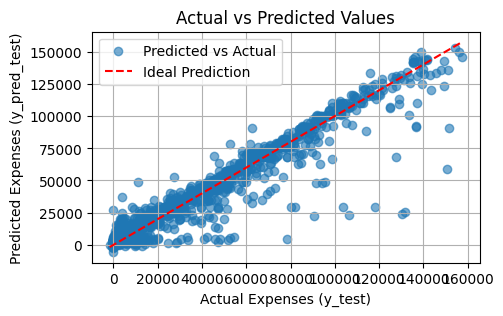

In [107]:
# Scatter plot comparing actual vs predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, gb_preds_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Expenses (y_test)")
plt.ylabel("Predicted Expenses (y_pred_test)")
plt.legend()
plt.grid()
plt.show()

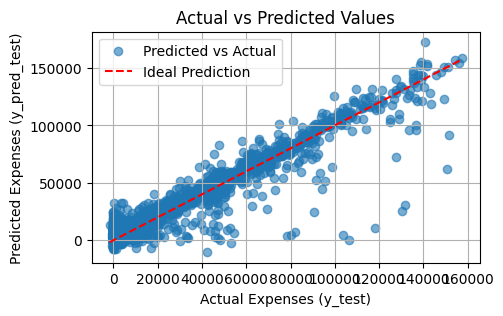

In [109]:
# Scatter plot comparing actual vs predicted values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, mlp_preds_test, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Expenses (y_test)")
plt.ylabel("Predicted Expenses (y_pred_test)")
plt.legend()
plt.grid()
plt.show()

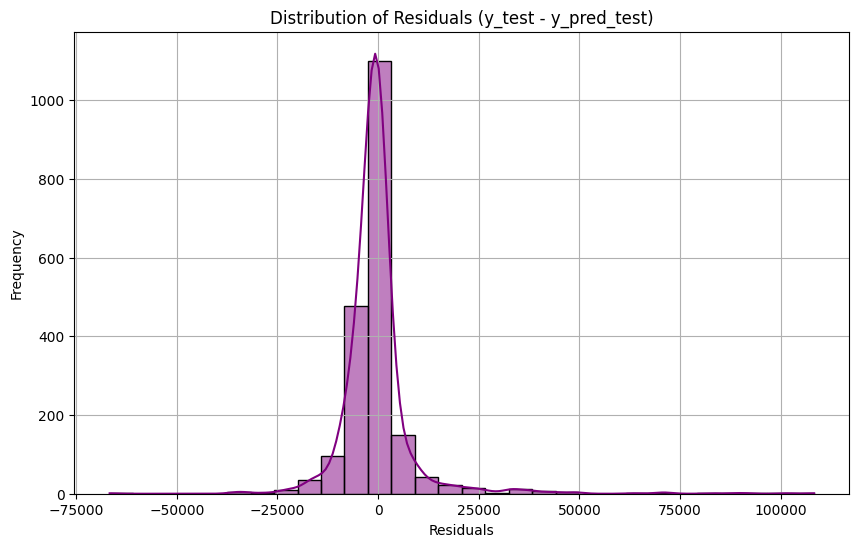

In [110]:
# Residuals distribution plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.title("Distribution of Residuals (y_test - y_pred_test)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

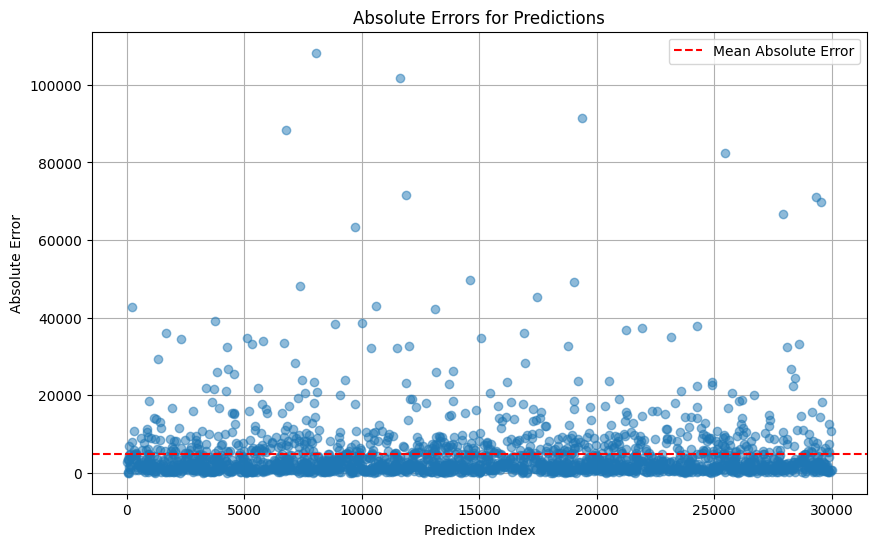

In [111]:
# Error trend (Absolute Error per Prediction)
absolute_errors = np.abs(residuals)
plt.figure(figsize=(10, 6))
plt.plot(absolute_errors, marker="o", linestyle="", alpha=0.5)
plt.axhline(y=np.mean(absolute_errors), color="red", linestyle="--", label="Mean Absolute Error")
plt.title("Absolute Errors for Predictions")
plt.xlabel("Prediction Index")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()